In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import scipy.constants as scp
from tabulate import tabulate

---

# Dämpfung

In [2]:
#gemessene Werte:
t_d = 60 * np.array([0, 2, 4, 6, 8, 10, 12]) #s
dt_d = np.full(7, 0.2)
f_d = (1/60) * 2 * np.pi * np.array([610, 550, 505, 460, 420, 390, 355]) #rad/s
df_d = (1/60) * 2 * np.pi * np.full(7, 5)

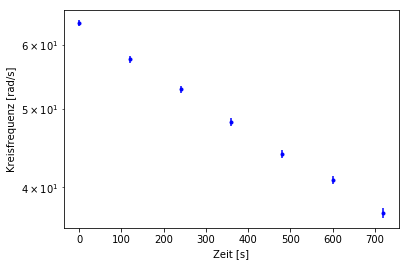

In [3]:
plt.errorbar(x=t_d, xerr=dt_d, y=f_d, yerr=df_d, fmt=".", color='blue')
plt.xlabel('Zeit [s]')
plt.ylabel('Kreisfrequenz [rad/s]')
plt.yscale('log')

In [4]:
#Fit:
def damp(x, a, b):
    return a * np.exp(-b * x)

popt_damp, pcov_damp = curve_fit(damp, t_d, f_d, sigma=df_d, p0=[62, 0.000764])

print("omega_0=",popt_damp[0], ", Standardfehler=", np.sqrt(pcov_damp[0][0]))
print("Dämpfung=",popt_damp[1], ", Standardfehler=", np.sqrt(pcov_damp[1][1]))

delta = popt_damp[1]
ddelta = np.sqrt(pcov_damp[1][1])

omega_0= 63.41751293238041 , Standardfehler= 0.2773490466932288
Dämpfung= 0.0007490155909127646 , Standardfehler= 1.2158907880738112e-05


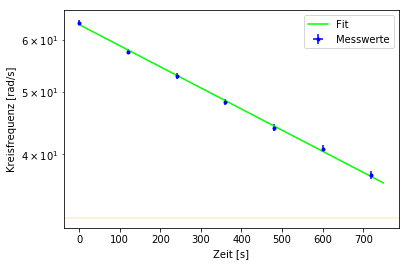

In [5]:
plt.errorbar(x=t_d, xerr=dt_d, y=f_d, yerr=df_d, fmt=".", color='blue', label='Messwerte')
plt.xlabel('Zeit [s]')
plt.ylabel('Kreisfrequenz [rad/s]')
plt.yscale('log')
x=np.linspace(0,750, 100)
plt.plot(x, damp(x,*popt_damp), color='lime', label='Fit')
plt.legend()
plt.axhline(y=0.5*f_d[0], color='orange', alpha=0.2)

In [6]:
#halbwertszeit:
t_half = np.log(2)/popt_damp[1]
dt_half = t_half * np.sqrt((np.sqrt(pcov_damp[1][1])/(popt_damp[1]))**2)

print(t_half)
print(dt_half)

925.4108845922192
15.022365133784836


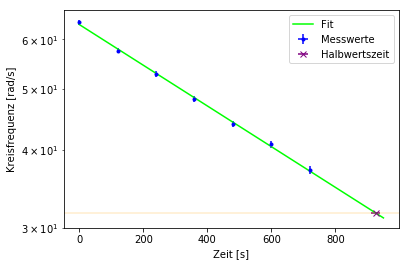

In [7]:
plt.errorbar(x=t_d, xerr=dt_d, y=f_d, yerr=df_d, fmt=".", color='blue', label='Messwerte')
plt.xlabel('Zeit [s]')
plt.ylabel('Kreisfrequenz [rad/s]')
plt.yscale('log')
x=np.linspace(0,950, 100)
plt.plot(x, damp(x,*popt_damp), color='lime', label='Fit')
plt.axhline(y=0.5*popt_damp[0], color='orange', alpha=0.2)
plt.errorbar(x=t_half, y=0.5*popt_damp[0], xerr=dt_half, color='purple', fmt='x', label='Halbwertszeit')
plt.legend()
plt.savefig("./output/Daempfung.pdf", format="pdf")

# Präzession

### Winkelabhängigkeit

In [8]:
Winkel30_60 = np.abs(76.6-74.7)/(2 * 1.5**2)
Winkel30_90 = np.abs(76.6-77.2)/(2 * 1.5**2)
Winkel60_90 = np.abs(74.7-77.2)/(2 * 1.5**2)

print(Winkel30_60, Winkel30_90, Winkel60_90)

0.42222222222222033 0.13333333333333522 0.5555555555555556


### Frequenzabhängigkeit

In [9]:
#1 gewicht bei 15cm:
omega_1_15 = (1/60) * 2 * np.pi * np.array([540, 450, 390, 320]) #rad/s
Tp_1_15 = np.array([103.8, 88.3, 77.6, 64.7]) #s

#1 gewicht bei 20cm:
omega_1_20 = (1/60) * 2 * np.pi * np.array([665, 570, 480, 350])
Tp_1_20 = np.array([95.2, 82.2, 70.8, 52.4])

#2 gewichte bei 15cm:
omega_2_15 = (1/60) * 2 * np.pi * np.array([530, 470, 410, 360])
Tp_2_15 = np.array([52.7, 47.2, 41.7, 36.9])

#2 gewichte bei 20cm:
omega_2_20 = (1/60) * 2 * np.pi * np.array([510, 380, 345, 290])
Tp_2_20 = np.array([38.5, 29.1, 26.4, 22.6])

#fehler:
domega = (1/60) * 2 * np.pi * 5 #rad/s
dTp = 1.5 #s

#berechne mittelwerte:
omega_1_15_f = np.empty(4)
omega_1_20_f = np.empty(4)
omega_2_15_f = np.empty(4)
omega_2_20_f = np.empty(4)

domega_1_15_f = np.empty(4)
domega_1_20_f = np.empty(4)
domega_2_15_f = np.empty(4)
domega_2_20_f = np.empty(4)


omega_1_15_m = np.empty(4)
omega_1_20_m = np.empty(4)
omega_2_15_m = np.empty(4)
omega_2_20_m = np.empty(4)

domega_1_15_m = np.empty(4)
domega_1_20_m = np.empty(4)
domega_2_15_m = np.empty(4)
domega_2_20_m = np.empty(4)

print('Ausgangswerte:')
print(omega_1_15)
print(omega_1_20)
print(omega_2_15)
print(omega_2_20)
print('Fehler AW:', domega)

for i in range(0, 4):
    a = damp(Tp_1_15[i], omega_1_15[i], delta)
    da = np.sqrt((domega * np.exp(-delta * Tp_1_15[i]))**2 + 
                 (ddelta * omega_1_15[i] * Tp_1_15[i] * np.exp(-delta * Tp_1_15[i]))**2 + 
                 (dTp * delta * omega_1_15[i] * np.exp(-delta * Tp_1_15[i]))**2)
    b = damp(Tp_1_20[i], omega_1_20[i], delta)
    db = np.sqrt((domega * np.exp(-delta * Tp_1_20[i]))**2 + 
                 (ddelta * omega_1_20[i] * Tp_1_20[i] * np.exp(-delta * Tp_1_20[i]))**2 + 
                 (dTp * delta * omega_1_20[i] * np.exp(-delta * Tp_1_20[i]))**2)
    c = damp(Tp_2_15[i], omega_2_15[i], delta)
    dc = np.sqrt((domega * np.exp(-delta * Tp_2_15[i]))**2 + 
                 (ddelta * omega_2_15[i] * Tp_2_15[i] * np.exp(-delta * Tp_2_15[i]))**2 + 
                 (dTp * delta * omega_2_15[i] * np.exp(-delta * Tp_2_15[i]))**2)
    d = damp(Tp_2_20[i], omega_2_20[i], delta)
    dd = np.sqrt((domega * np.exp(-delta * Tp_2_20[i]))**2 + 
                 (ddelta * omega_2_20[i] * Tp_2_20[i] * np.exp(-delta * Tp_2_20[i]))**2 + 
                 (dTp * delta * omega_2_20[i] * np.exp(-delta * Tp_2_20[i]))**2)
    omega_1_15_f[i] = a
    omega_1_20_f[i] = b
    omega_2_15_f[i] = c
    omega_2_20_f[i] = d
    domega_1_15_f[i] = da
    domega_1_20_f[i] = db
    domega_2_15_f[i] = dc
    domega_2_20_f[i] = dd
    omega_1_15_m[i] = 0.5 * (a + omega_1_15[i])
    omega_1_20_m[i] = 0.5 * (b + omega_1_20[i])
    omega_2_15_m[i] = 0.5 * (c + omega_2_15[i])
    omega_2_20_m[i] = 0.5 * (d + omega_2_20[i])
    domega_1_15_m[i] = 0.5 * np.sqrt((domega)**2 + (da)**2)
    domega_1_20_m[i] = 0.5 * np.sqrt((domega)**2 + (db)**2)
    domega_2_15_m[i] = 0.5 * np.sqrt((domega)**2 + (dc)**2)
    domega_2_20_m[i] = 0.5 * np.sqrt((domega)**2 + (dd)**2)
    
print('---')
print('---')
print('Endwerte:')
print(omega_1_15_f)
print(omega_1_20_f)
print(omega_2_15_f)
print(omega_2_20_f)
print('---')
print('Fehler Endwerte:')
print(domega_1_15_f)
print(domega_1_20_f)
print(domega_2_15_f)
print(domega_2_20_f)
print('---')
print('---')
print('Mittelwerte:')
print(omega_1_15_m)
print(omega_1_20_m)
print(omega_2_15_m)
print(omega_2_20_m)
print('---')
print('Fehler MW:')
print(domega_1_15_m)
print(domega_1_20_m)
print(domega_2_15_m)
print(domega_2_20_m)
print('---')
print('---')

Ausgangswerte:
[56.54866776 47.1238898  40.8407045  33.51032164]
[69.63863715 59.69026042 50.26548246 36.65191429]
[55.50147021 49.21828491 42.9350996  37.69911184]
[53.40707511 39.79350695 36.12831552 30.36872898]
Fehler AW: 0.5235987755982988
---
---
Endwerte:
[52.3186982  44.10803698 38.53456511 31.92508905]
[64.84587242 56.12603481 47.66933429 35.24124895]
[53.35332975 47.5086435  41.61479336 36.67142569]
[51.88896409 38.93553786 35.42093075 29.85898127]
---
Fehler Endwerte:
[0.49243283 0.4948595  0.49725733 0.50074764]
[0.49865795 0.49951535 0.50111856 0.5054999 ]
[0.50804177 0.50895273 0.51008327 0.51125391]
[0.51262073 0.51435848 0.5150126  0.51596715]
---
---
Mittelwerte:
[54.43368298 45.61596339 39.6876348  32.71770534]
[67.24225479 57.90814761 48.96740838 35.94658162]
[54.42739998 48.36346421 42.27494648 37.18526877]
[52.6480196  39.3645224  35.77462313 30.11385513]
---
Fehler MW:
[0.35939038 0.36022271 0.36104727 0.36225125]
[0.36152988 0.36182567 0.36237946 0.36389759]
[0.3

In [10]:
#Coole Tabelle:
w_i = np.round(np.concatenate((omega_1_15, omega_1_20, omega_2_15, omega_2_20), axis=None), 1)
w_f = np.round(np.concatenate((omega_1_15_f, omega_1_20_f, omega_2_15_f, omega_2_20_f), axis=None), 1)
w_m = np.round(np.concatenate((omega_1_15_m, omega_1_20_m, omega_2_15_m, omega_2_20_m), axis=None), 1)
dw_i = np.round(np.full(16, domega),  1)
dw_f = np.round(np.concatenate((domega_1_15_f, domega_1_20_f, domega_2_15_f, domega_2_20_f), axis=None), 1)
dw_m = np.round(np.concatenate((domega_1_15_m, domega_1_20_m, domega_2_15_m, domega_2_20_m), axis=None), 1)

cnfg = np.array(['1M@15cm', None, None, None,
                '1M@20cm', None, None, None,
                '2M@15cm', None, None, None,
                '2M@20cm', None, None, None,]) 


header = ['Konfig', 'init', 'x', 'fin', 'x', 'mean', 'x']
table = zip(cnfg, w_i, dw_i, w_f, dw_f, w_m, dw_m)

print(tabulate(table, headers=header, tablefmt="latex"))

\begin{tabular}{lrrrrrr}
\hline
 Konfig   &   init &   x &   fin &   x &   mean &   x \\
\hline
 1M@15cm  &   56.5 & 0.5 &  52.3 & 0.5 &   54.4 & 0.4 \\
          &   47.1 & 0.5 &  44.1 & 0.5 &   45.6 & 0.4 \\
          &   40.8 & 0.5 &  38.5 & 0.5 &   39.7 & 0.4 \\
          &   33.5 & 0.5 &  31.9 & 0.5 &   32.7 & 0.4 \\
 1M@20cm  &   69.6 & 0.5 &  64.8 & 0.5 &   67.2 & 0.4 \\
          &   59.7 & 0.5 &  56.1 & 0.5 &   57.9 & 0.4 \\
          &   50.3 & 0.5 &  47.7 & 0.5 &   49   & 0.4 \\
          &   36.7 & 0.5 &  35.2 & 0.5 &   35.9 & 0.4 \\
 2M@15cm  &   55.5 & 0.5 &  53.4 & 0.5 &   54.4 & 0.4 \\
          &   49.2 & 0.5 &  47.5 & 0.5 &   48.4 & 0.4 \\
          &   42.9 & 0.5 &  41.6 & 0.5 &   42.3 & 0.4 \\
          &   37.7 & 0.5 &  36.7 & 0.5 &   37.2 & 0.4 \\
 2M@20cm  &   53.4 & 0.5 &  51.9 & 0.5 &   52.6 & 0.4 \\
          &   39.8 & 0.5 &  38.9 & 0.5 &   39.4 & 0.4 \\
          &   36.1 & 0.5 &  35.4 & 0.5 &   35.8 & 0.4 \\
          &   30.4 & 0.5 &  29.9 & 0.5 &   30.1 &

s_1_15= 1.9344428234083737 , Standardfehler= 0.014603748110013554
s_1_20= 1.42777663414833 , Standardfehler= 0.009021887623316936
s_2_15= 0.9781378214909068 , Standardfehler= 0.005250532095977396
s_2_20= 0.7371611098925215 , Standardfehler= 0.003681811713732508


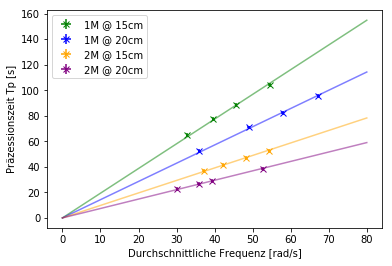

In [11]:
#Linearer Plot:
def lin0(x, a):
    return a*x

dTp_ = np.full(4, dTp)

#Fits
popt_1_15, pcov_1_15 = curve_fit(lin0, omega_1_15_m, Tp_1_15, sigma=dTp_)
popt_1_20, pcov_1_20 = curve_fit(lin0, omega_1_20_m, Tp_1_20, sigma=dTp_)
popt_2_15, pcov_2_15 = curve_fit(lin0, omega_2_15_m, Tp_2_15, sigma=dTp_)
popt_2_20, pcov_2_20 = curve_fit(lin0, omega_2_20_m, Tp_2_20, sigma=dTp_)

#output
print("s_1_15=",popt_1_15[0], ", Standardfehler=", np.sqrt(pcov_1_15[0][0]))
print("s_1_20=",popt_1_20[0], ", Standardfehler=", np.sqrt(pcov_1_20[0][0]))
print("s_2_15=",popt_2_15[0], ", Standardfehler=", np.sqrt(pcov_2_15[0][0]))
print("s_2_20=",popt_2_20[0], ", Standardfehler=", np.sqrt(pcov_2_20[0][0]))

s_1_15 = popt_1_15[0]
s_1_20 = popt_1_20[0]
s_2_15 = popt_2_15[0]
s_2_20 = popt_2_20[0]


#Plot
plt.xlabel('Durchschnittliche Frequenz [rad/s]')
plt.ylabel('Präzessionszeit Tp [s]')
x=np.linspace(0,80, 100)
plt.plot(x, lin0(x,*popt_1_15), color='green', alpha=0.5)
plt.errorbar(x=omega_1_15_m, y=Tp_1_15, xerr=domega_1_15_m, yerr=dTp_, color='green', fmt='x', label='1M @ 15cm')
plt.plot(x, lin0(x,*popt_1_20), color='blue', alpha=0.5)
plt.errorbar(x=omega_1_20_m, y=Tp_1_20, xerr=domega_1_20_m, yerr=dTp_, color='blue', fmt='x', label='1M @ 20cm')
plt.plot(x, lin0(x,*popt_2_15), color='orange', alpha=0.5)
plt.errorbar(x=omega_2_15_m, y=Tp_2_15, xerr=domega_2_15_m, yerr=dTp_, color='orange', fmt='x', label='2M @ 15cm')
plt.plot(x, lin0(x,*popt_2_20), color='purple', alpha=0.5)
plt.errorbar(x=omega_2_20_m, y=Tp_2_20, xerr=domega_2_20_m, yerr=dTp_, color='purple', fmt='x', label='2M @ 20cm')
plt.legend()
plt.savefig("./output/TPgegenOMEGA_F.pdf", format="pdf")

In [12]:
#Berechnung des Trägheitsmoment:
s = np.array([s_1_15, s_1_20, s_2_15, s_2_20])
ds = np.array([np.sqrt(pcov_1_15[0][0]), np.sqrt(pcov_1_20[0][0]), np.sqrt(pcov_2_15[0][0]), np.sqrt(pcov_2_20[0][0])])
m = (1/1000) * np.array([9.85, 9.85, 2*9.85, 2*9.85]) #kg
l = np.array([0.15, 0.20, 0.15, 0.20])
dl = np.array([0.5*0.011, 0.5*0.011, 0.011, 0.011])

Iz_1 = m * scp.g * l * s /(2 * np.pi)
dIz_1 = Iz_1 * np.sqrt((dl/l)**2 + (ds/s)**2)

print(Iz_1)
print(dIz_1)
print('---')

#Durchschnitt:
Iz = np.mean(Iz_1)
dIz = np.sqrt((np.std(Iz_1, ddof=1)/np.sqrt(4))**2 + (np.sqrt(np.sum((dIz_1/4)**2)))**2)

print('I_z =', Iz, '+/-', dIz)

[0.00446092 0.00439003 0.00451127 0.00453314]
[0.000167   0.00012387 0.00033171 0.00025035]
---
I_z = 0.004473838496122374 +/- 0.00012043789607126558


In [13]:
#Coole Tabelle 2:
cnfg2 = np.array(['1M@15cm', '1M@20cm', '2M@15cm', '2M@20cm']) 
header2 = ['Konfig', 's_i', 'x', 'I_z', 'x']
tab2 = zip(cnfg2, np.round(s, 3), np.round(ds, 3), np.round(Iz_1, 5), np.round(dIz_1, 5))

print(tabulate(tab2, headers=header2, tablefmt="latex"))

\begin{tabular}{lrrrr}
\hline
 Konfig   &   s\_i &     x &     I\_z &       x \\
\hline
 1M@15cm  & 1.934 & 0.015 & 0.00446 & 0.00017 \\
 1M@20cm  & 1.428 & 0.009 & 0.00439 & 0.00012 \\
 2M@15cm  & 0.978 & 0.005 & 0.00451 & 0.00033 \\
 2M@20cm  & 0.737 & 0.004 & 0.00453 & 0.00025 \\
\hline
\end{tabular}


In [14]:
#Theoretischer Wert von I:
I_theo = (2/5) * 4.164 * 0.0508**2

#Signifikanztest:
signIz_1 = np.abs(Iz - I_theo)/dIz

print(I_theo)
print(signIz_1)

0.004298313984
1.4573860707306974


# Nutationsbewegung

### Frequenz und Umlaufzeit

s= 0.06383528939132234 , Standardfehler= 0.00027757834166146226


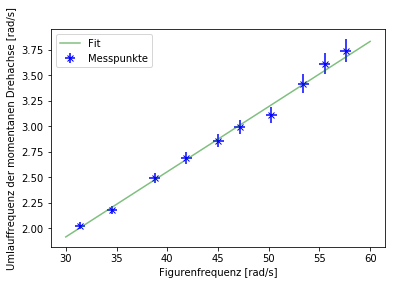

In [15]:
#Messdaten:
omega_F = (1/60) * 2 * np.pi * np.array([550, 530, 510, 480, 450, 430, 400, 370, 330, 300]) #rad/s
domega_F = (1/60) * 2 * np.pi * np.full(10, 5.0)
t = (1/10) * np.array([16.8, 17.4, 18.4, 20.2, 21.0, 22.0, 23.4, 25.2, 28.8, 31.0]) #s
dt = (1/10) * np.full(10, 0.5)

omega_D = 2 * np.pi /t
domega_D = 2 * np.pi * dt /(t**2)

popt_ft, pcov_ft = curve_fit(lin0, omega_F, omega_D, sigma=domega_D)

print("s=",popt_ft[0], ", Standardfehler=", np.sqrt(pcov_ft[0][0]))

s_ft = popt_ft[0]
ds_ft = np.sqrt(pcov_ft[0][0])

plt.xlabel('Figurenfrequenz [rad/s]')
plt.ylabel('Umlauffrequenz der momentanen Drehachse [rad/s]')
x=np.linspace(30,60, 100)
plt.plot(x, lin0(x,*popt_ft), color='green', alpha=0.5, label='Fit')
plt.errorbar(x=omega_F, y=omega_D, yerr=domega_D, xerr=domega_F , color='blue', fmt='x', label='Messpunkte')
plt.legend()
plt.savefig("./output/FitNutation1.pdf", format="pdf")

In [16]:
#Berechnung von Ix:
Ix_1 = Iz/(1 - s_ft)
dIx_1 = np.sqrt((Iz * ds_ft /(1-s_ft)**2)**2 + (dIz * (2 * s_ft - 1)/(1 - s_ft))**2)

print('I_x=', Ix_1, '+/-', dIx_1)

I_x= 0.004778901026095679 +/- 0.00011223441029679485


In [17]:
#Coole tabelle 3:
header3 = ['Nr.', 'w_f', 'x', 'Omega', 'x']
tab3 = zip(np.arange(1, 11),   np.round(omega_F, 1), np.round(domega_F, 1), np.round(omega_D, 1), np.round(domega_F, 1))

print(tabulate(tab3, headers=header3, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
   Nr. &   w\_f &   x &   Omega &   x \\
\hline
     1 &  57.6 & 0.5 &     3.7 & 0.5 \\
     2 &  55.5 & 0.5 &     3.6 & 0.5 \\
     3 &  53.4 & 0.5 &     3.4 & 0.5 \\
     4 &  50.3 & 0.5 &     3.1 & 0.5 \\
     5 &  47.1 & 0.5 &     3   & 0.5 \\
     6 &  45   & 0.5 &     2.9 & 0.5 \\
     7 &  41.9 & 0.5 &     2.7 & 0.5 \\
     8 &  38.7 & 0.5 &     2.5 & 0.5 \\
     9 &  34.6 & 0.5 &     2.2 & 0.5 \\
    10 &  31.4 & 0.5 &     2   & 0.5 \\
\hline
\end{tabular}


### Frequenzpaare fF und fN 

s= 0.9277232244469409 , Standardfehler= 0.003281551634290581


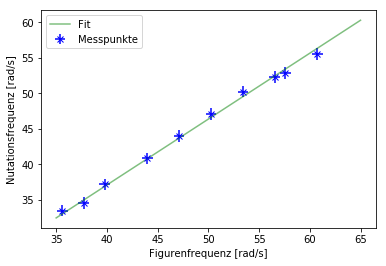

In [18]:
#Messdaten:
omega_f = (1/60) * 2 * np.pi * np.array([580, 550, 510, 480, 450, 420, 380, 360, 340, 540])
domega_f = domega_F
omega_n = (1/60) * 2 * np.pi * np.array([530, 505, 480, 450, 420, 390, 355, 330, 320, 500])
domega_n = (1/60) * 2 * np.pi * np.full(10, 8)

popt_fn, pcov_fn = curve_fit(lin0, omega_f, omega_n, sigma=domega_n)

print("s=",popt_fn[0], ", Standardfehler=", np.sqrt(pcov_fn[0][0]))

s_fn = popt_fn[0]
ds_fn = np.sqrt(pcov_fn[0][0])

plt.xlabel('Figurenfrequenz [rad/s]')
plt.ylabel('Nutationsfrequenz [rad/s]')
x=np.linspace(35,65, 100)
plt.plot(x, lin0(x,*popt_fn), color='green', alpha=0.5, label='Fit')
plt.errorbar(x=omega_f, y=omega_n, yerr=domega_n, xerr=domega_f, color='blue', fmt='x', label='Messpunkte')
plt.legend()
plt.savefig("./output/FitNutation2.pdf", format="pdf")

In [19]:
#Berechnung von Ix:
Ix_2 = Iz/s_fn
dIx_2 = Ix_2 * np.sqrt((dIz/Iz)**2 + (ds_fn/s_fn)**2)

print('I_x=', Ix_2, '+/-', dIx_2)

I_x= 0.004822384929286898 +/- 0.00013093679071935673


In [20]:
sign = np.abs(Ix_1 - Ix_2)/np.sqrt(dIx_1**2 + dIx_2**2)
print(sign)

0.2521451928588985
